In [1]:
import pandas as pd

# importing matplotlib module
from matplotlib import pyplot as plt


In [2]:
#!qbraid jobs enable -n qbraid_sdk

In [3]:
import numpy as np

In [4]:
df1=pd.read_csv("qupermarket_weather_data.csv")
df1.head()


,Montag,Mon,Dienstag,Tue,Mittwoch,Wed,Donnerstag,Thu,Freitag,Fri,Samstag,Sat,Sonntag,Sun
0,0:00,Night,0:00,Night,0:00,Night,0:00,Night,0:00,Night,0:00,Night,0:00,Night
1,0:30,Night,0:30,Night,0:30,Night,0:30,Night,0:30,Night,0:30,Night,0:30,Night
2,1:00,Night,1:00,Night,1:00,Night,1:00,Night,1:00,Night,1:00,Night,1:00,Night
3,1:30,Night,1:30,Night,1:30,Night,1:30,Night,1:30,Night,1:30,Night,1:30,Night
4,2:00,Night,2:00,Night,2:00,Night,2:00,Night,2:00,Night,2:00,Night,2:00,Night


In [5]:
df_prod=df1.filter(["Montag","Mon","Tue","Wed","Thu", "Fri", "Sat", "Sun"])
df_prod.rename(columns = {'Montag':'Time'}, inplace = True)
df_prod.head()

,Time,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0:00,Night,Night,Night,Night,Night,Night,Night
1,0:30,Night,Night,Night,Night,Night,Night,Night
2,1:00,Night,Night,Night,Night,Night,Night,Night
3,1:30,Night,Night,Night,Night,Night,Night,Night
4,2:00,Night,Night,Night,Night,Night,Night,Night


In [6]:
cols = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df_prod[cols] = df_prod[cols].replace({"Night":0.0, "Rain":25.0, "Cloudy": 40.0, "Sun":90.0})
                  


     Time   Mon   Tue   Wed   Thu   Fri   Sat   Sun
0    0:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1    0:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2    1:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3    1:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4    2:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
5    2:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
6    3:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
7    3:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
8    4:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
9    4:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
10   5:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
11   5:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
12   6:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
13   6:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
14   7:00  40.0  25.0  25.0  90.0  90.0  40.0  25.0
15   7:30  40.0  25.0  25.0  90.0  90.0  40.0  25.0
16   8:00  40.0  25.0  40.0  90.0  40.0  90.0  40.0
17   8:30  25.0  40.0  25.0  40.0  90.0  90.0  40.0
18   9:00  4

In [7]:
df_cons= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

In [8]:
df_cons[cols] = 60


df_cons["Sun"] = 12
boolean_condition = df_cons.index < 16
for i in cols:
    df_cons.loc[boolean_condition, i] = 12.
    
boolean_condition = df_cons.index > 43
for i in cols:
    df_cons.loc[boolean_condition, i] = 12

In [9]:
#print(df_cons)

     Time  Mon  Tue  Wed  Thu  Fri  Sat  Sun
0    0:00   12   12   12   12   12   12   12
1    0:30   12   12   12   12   12   12   12
2    1:00   12   12   12   12   12   12   12
3    1:30   12   12   12   12   12   12   12
4    2:00   12   12   12   12   12   12   12
5    2:30   12   12   12   12   12   12   12
6    3:00   12   12   12   12   12   12   12
7    3:30   12   12   12   12   12   12   12
8    4:00   12   12   12   12   12   12   12
9    4:30   12   12   12   12   12   12   12
10   5:00   12   12   12   12   12   12   12
11   5:30   12   12   12   12   12   12   12
12   6:00   12   12   12   12   12   12   12
13   6:30   12   12   12   12   12   12   12
14   7:00   12   12   12   12   12   12   12
15   7:30   12   12   12   12   12   12   12
16   8:00   60   60   60   60   60   60   12
17   8:30   60   60   60   60   60   60   12
18   9:00   60   60   60   60   60   60   12
19   9:30   60   60   60   60   60   60   12
20  10:00   60   60   60   60   60   60   12
21  10:30 

Graphs of Solar Production and Energy need over week days, each bin represents the solar energy production and the energy consumtion in a half an hour slot.

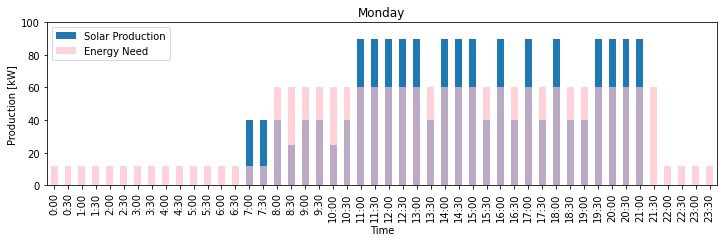

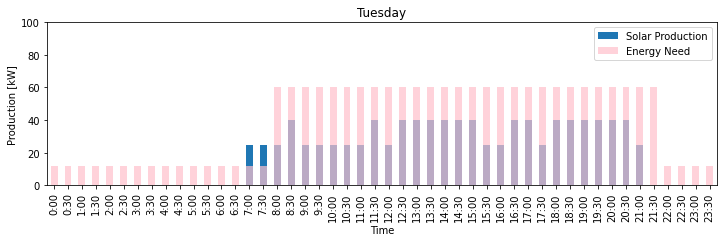

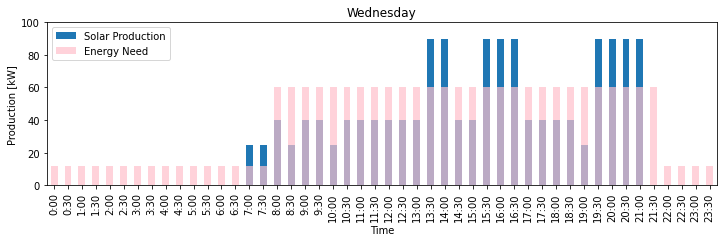

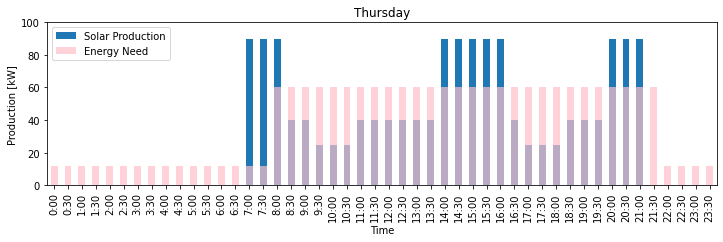

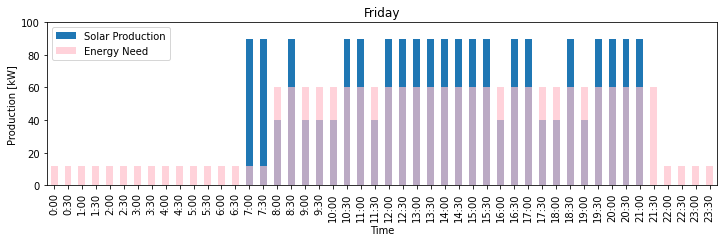

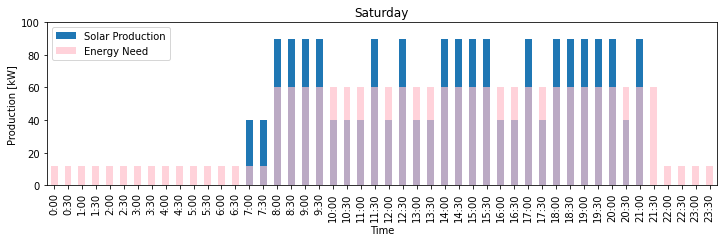

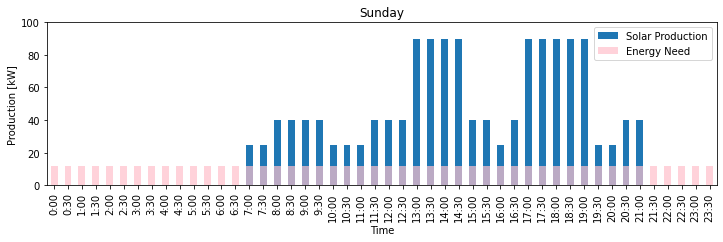

In [10]:
week_days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
full_names=res = dict(zip(cols, week_days))

for i in cols:
    ax=df_prod.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Solar Production")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Production [kW]")
    ax.set_ylim([0,100])
    ax.set_title(full_names[i])
    df_cons.plot(ax=ax , x="Time", y=i, kind="bar", color="pink", alpha=0.7, figsize=(12, 3), label="Energy Need")
plt.show()

In [11]:
a_cons=df_cons.iloc[:,1:].values.T

a_prod=df_prod.iloc[:,1:].values.T

a_plug=a_cons - a_prod

a_imb=a_plug.copy()

a_plug[a_plug <0]=0

a_co2=a_plug*420.

df_CO2= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

for i in range(len(cols)):
    df_CO2[cols[i]]=a_co2[i]
    
    

Graphs over weekdays of CO2 production for each half an hour time slot for the system SolarProduction+EnergyNeed without considering the mall battery

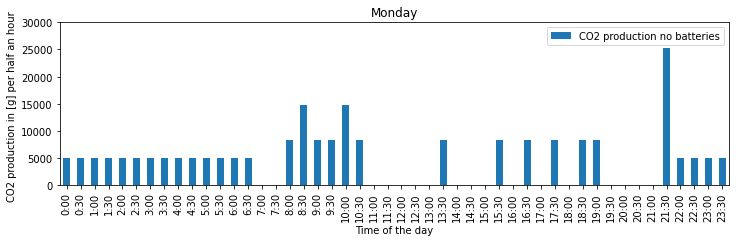

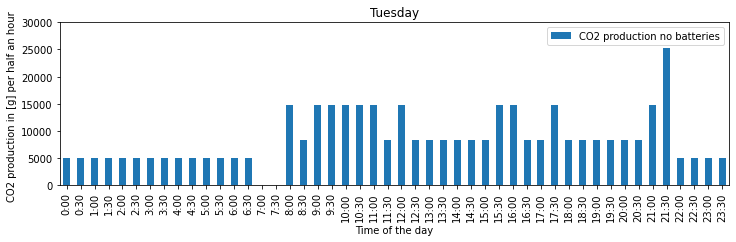

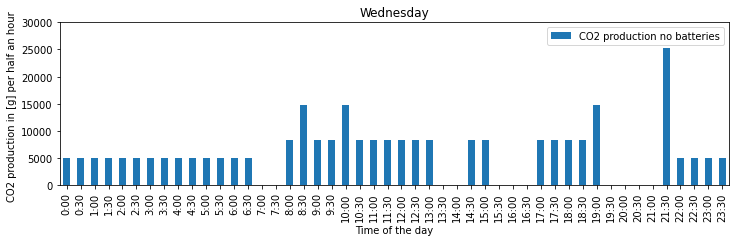

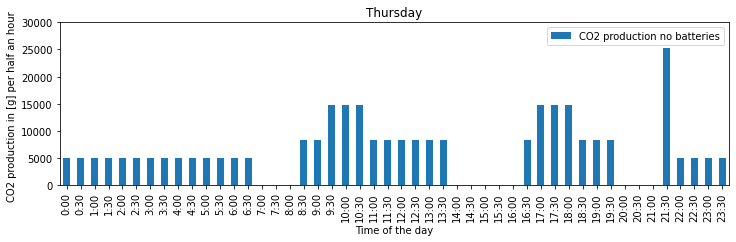

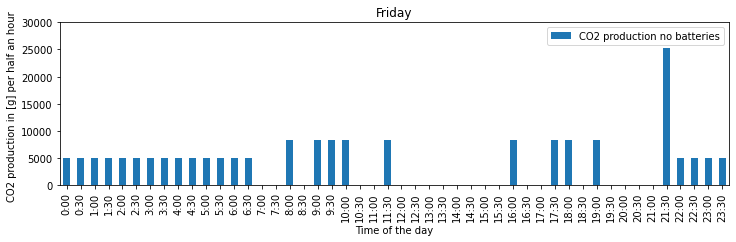

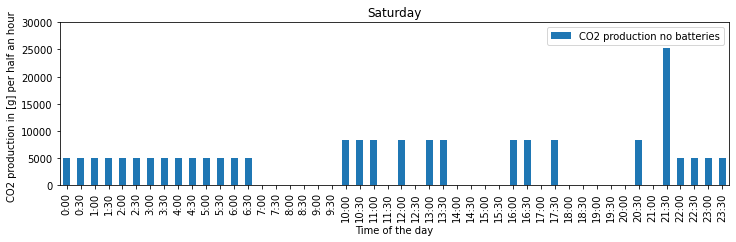

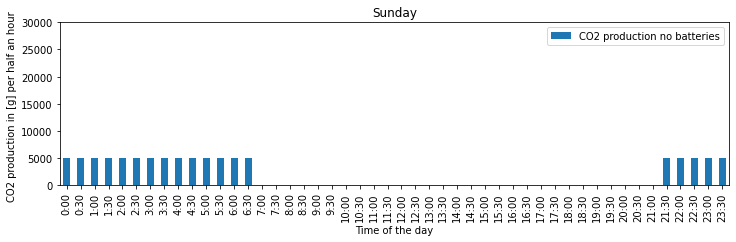

In [12]:
for i in cols:
    ax=df_CO2.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="CO2 production no batteries")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,30000])
   
plt.show()

In [13]:
dfc=pd.read_csv("qupermarket_car_data.csv")
dfc.head()


short_days=["Mon","Tue", "Wed","Thu","Fri","Sat"]

dict_cars={}
for i in range(len(week_days)-1):
    dict_cars[short_days[i]]= pd.DataFrame()
    dict_cars[short_days[i]]=dfc.loc[dfc['Day'] == week_days[i]]
    

In [14]:
mall_battery_cap=500
mall_battery_rate=120
ev_battery_cap=60
ev_battery_rate=120
week_days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
full_names=res = dict(zip(cols, week_days))

In [15]:
print(dict_cars['Mon'])

       Car     Day Arrival   PbatterA Depature  PbatteryD
0      Mo1  Monday     8:00      92.0     8:00       53.0
1      Mo2  Monday     8:00      73.0     8:30       42.0
2      Mo3  Monday     8:00      73.0     9:00       67.0
3      Mo4  Monday     8:00      85.0     8:00       14.0
4      Mo5  Monday     8:00      86.0     8:00       76.0
..     ...     ...      ...       ...      ...        ...
122  Mo123  Monday    20:30      84.0    21:30       57.0
123  Mo124  Monday    21:00      53.0    21:30       13.0
124  Mo125  Monday    21:00      92.0    21:00       78.0
125  Mo126  Monday    21:30      84.0    21:30        9.0
126  Mo127  Monday    21:30      82.0    21:30       10.0

[127 rows x 6 columns]


In [16]:
df_car_histo= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
df_car_histo[cols] = 0


a_histo=df_car_histo.iloc[:,1:].values.T
a_histo_pri=np.zeros_like(a_histo)


ArrData={}
PbatterA={}
DepData={}
PbatterD={}
for i in range(len(week_days)-1):
    ArrData[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 2 ].values
    PbatterA[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 3 ].values
    DepData[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 4 ].values
    PbatterD[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 5].values
    
    for k in range(ArrData[short_days[i]].shape[0]):
        start_index=df_prod.index[df_prod['Time'] == ArrData[short_days[i]][k] ].tolist()[0]
        end_index=df_prod.index[df_prod['Time'] == DepData[short_days[i]][k] ].tolist()[0]
        
        # print("%s %d"%( ArrData[short_days[i]][k] ,start_index))
        # print("%s %d"%(DepData[short_days[i]][k] ,end_index))
        #the index here runs up to end_index+1 as departure
        #time is intended at the end of the slot!
        for j in range(start_index,end_index+1):
             a_histo[i, j] = a_histo[i, j]+1
        a_histo_pri[i, end_index]=a_histo_pri[i, end_index]+1

for i in range(len(cols)):
    df_car_histo[cols[i]]=a_histo[i]

    
for i in range(len(cols)):
    df_car_histo["pridep"+cols[i]]=a_histo_pri[i]    
#print(df_car_histo)

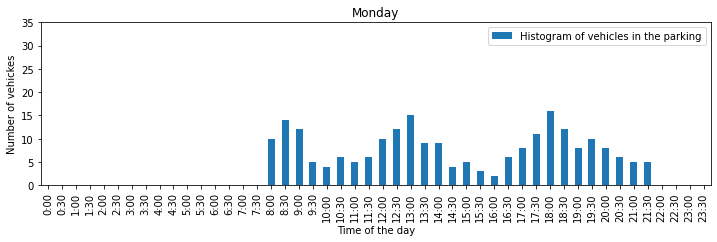

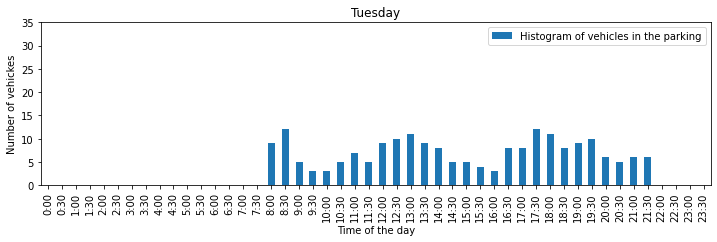

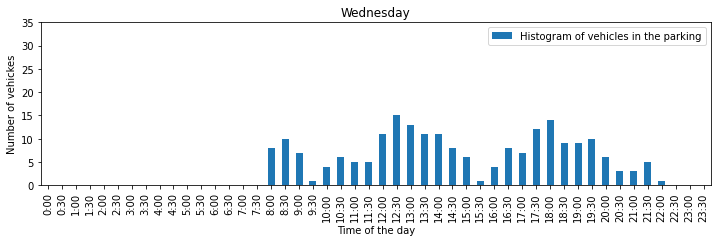

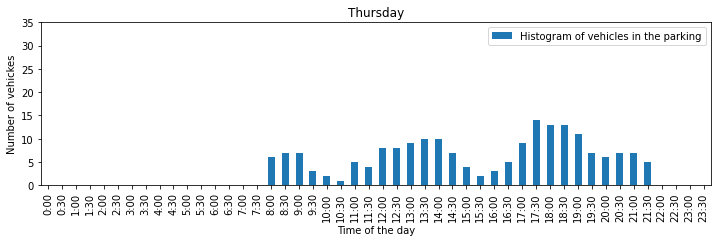

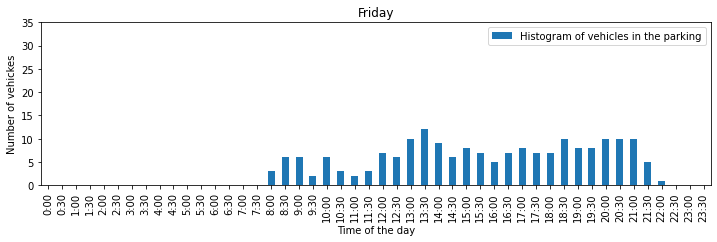

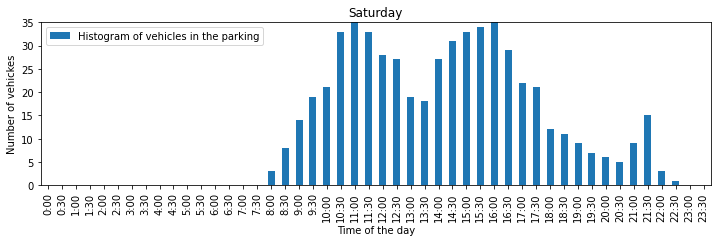

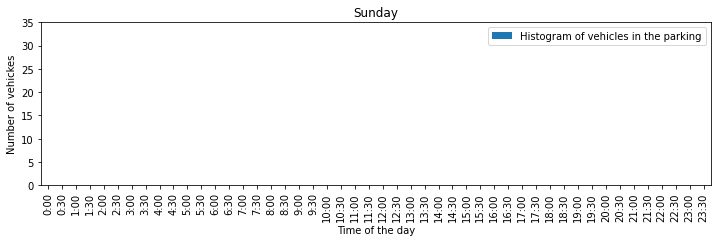

In [17]:

for i in cols:
    ax=df_car_histo.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Histogram of vehicles in the parking")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehickes")
    ax.set_ylim([0,35])
    ax.set_title(full_names[i])
plt.show()

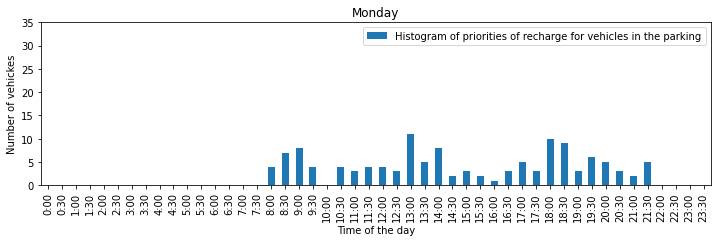

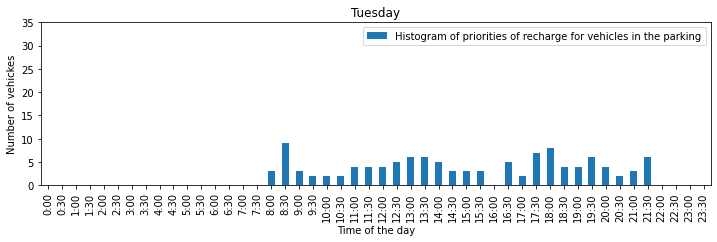

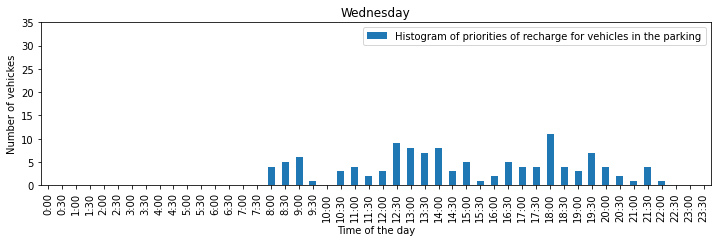

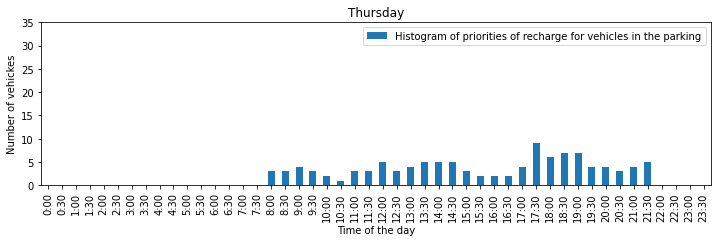

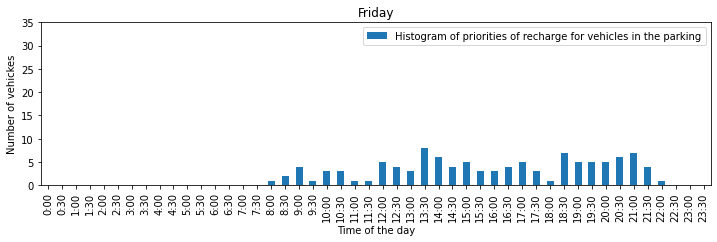

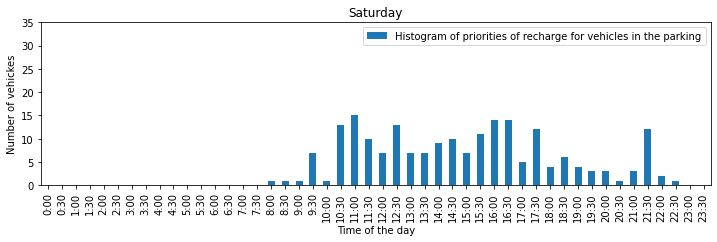

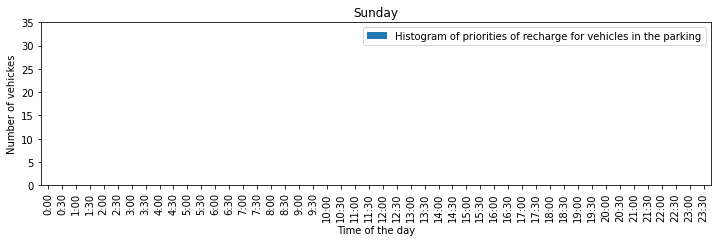

In [18]:
for i in cols:
    j="pridep"+i
    ax=df_car_histo.plot(x="Time", y=j, kind="bar", figsize=(12, 3), label="Histogram of priorities of recharge for vehicles in the parking")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehickes")
    ax.set_ylim([0,35])
    ax.set_title(full_names[i])
plt.show()

Matrix allocations


In [19]:
c_plug=420
c_bd=84
c_br=-84

a_plug=1
a_bd=2
a_br=1.3


aa_pp=a_plug*a_plug
aa_pbd=a_plug*a_bd
aa_pbr=a_plug*a_br
a_pb=a_plug*a_bd

# Conventional solution for mall battery modeling
First of all we validate our solution with a conventional method: simulated annealing

In [20]:
import networkx as nx
import dwave_networkx as dnx
import minorminer
import dimod
from dimod.binary_quadratic_model import BinaryQuadraticModel
from dwave.system.composites import EmbeddingComposite
from dwave.system import DWaveSampler
#from braket.aws import AwsDevice
#from braket.ocean_plugin import BraketSampler, BraketDWaveSampler

# part still in construction
n_bat_mall=1
E_bat_mall=500
r_bat_mall=120
n_qub_mb=n_bat_mall*3


C_bat_status=np.zeros_like(a_imb)


C_bat_status[0,0]=440

n_days=7
n_times=48

#we have 3 qubits for each battery, 1 for discharging 
#1 for charging and 1 for the slack variable

sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7
a_CO2_prod_conv=np.zeros((n_days,n_times))

r_bat_v=120
dt=0.5 # fraction of an hour
C_bat_mall=0
for d in range (n_days):
    for t in range(n_times):  
        #N_v=a_histo[d,t]
        N_v=0
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=0
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=(r_bat_mall**2)*aa_pp*dt*dt
            
        
        E_imb=a_imb[d,t]
        mu_p=np.zeros((n_qub_tot))
       
        r_bat_mdisc=r_bat_mall*dt 
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall*dt)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
        for k in range(n_bat_mall):
            for i in range(2*N_v):
                sigma_p[k,3+i]=+aa_pbd*(r_bat_disc*r_bat_v)*dt
                sigma_p[k+1,3+i]=-a_pbr*(r_bat_charge*r_bat_v)*dt
            mu_p[3*k]=( - 2*aa_pp*E_imb*r_bat_mdisc)    
            mu_p[3*k+1]=+(2*aa_pp*E_imb*r_bat_mcharge)
            mu_p[3*k+2]=0.
           
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=1
        
        
        sigma=sigma_slack+sigma_p
        mu=np.true_divide(mu_p, fac_bound)+mu_slack
        
        
        # run classical simulated annealing
        model = dimod.BinaryQuadraticModel(vartype="BINARY")
        model.add_linear_from_array(mu)
        model.add_quadratic_from_dense(sigma)
        
        print(model.quadratic)
        print(model.linear)
        #print(mu)
        #print(sigma)
        #model.add_linear_equality_constraint([(0, 1), (1, 1), (2, 1) ], 100000, -1)
        #model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        if E_imb>0:
            model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        else:
            model.add_linear_inequality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000,label="eq2", ub=-E_imb)
        
        sampler = dimod.SimulatedAnnealingSampler()
        
        results = sampler.sample(model)
        


        
        best_solution = results.first.sample
        print("Best solution")
        print(best_solution)
        energy=results.first.energy
        

        
        c_stars=np.zeros((n_qub_tot))
        for k,v in best_solution.items():
            if (isinstance(k, int)):
                c_stars[int(k)]=v
       
        # response aggregate
        #response_aggregate = response.aggregate()
        #print(response_aggregate)
        if (c_stars[0]==1 and c_stars[1]==1):
            c_stars[0]=0
            c_stars[1]=0
        
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        print(E_plug)
        
        a_CO2_prod_conv[d,t]=420.0*max(E_plug,0)
        
        
                                             

        
        
        
        

print(C_bat_status[n_days-1,n_times-1])
        # print results





{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2:

C:\Users\julie\.conda\envs\womanium\lib\site-packages\dimod\binary\binary_quadratic_model.py:764: UserWarning: Did not add constraint eq2. This constraint is feasible with any value for state variables.
  warnings.warn(


Best solution
{0: 0, 1: 1, 2: 0}
32.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -2451.0, 1: 4199.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -2451.0, 1: 4199.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -3601.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
30.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -3601.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
30.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1:

Best solution
{0: 0, 1: 0, 2: 1}
20.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -400001.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
20.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -400001.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
20.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -700001.0, 1: 4199.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
35.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1200001.0, 1: 7199.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
60.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -240001.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
12.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -240001.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
12.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -240001.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
12.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -240001.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 0, 1: 0, 2: 1}
12.0
{(1, 0): 3604.0, (2, 0): 4.0, (2,

Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -12169.0, 1: -9361.0, 2: -1.0}
Best solution
{0: 1, 1: 1, 2: 0}
-78.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -12169.0, 1: -9361.0, 2: -1.0}
Best solution
{0: 1, 1: 1, 2: 0}
-78.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -3601.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
30.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -2451.0, 1: 4199.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -2451.0, 1: 4199.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -2451.0, 1: 4199.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801

Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 2399.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -3601.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
10.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -801.0, 1: 399999.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -3601.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-10.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -600001.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-30.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -600001.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-30.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1801.0, 1: -600001.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-30.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -7201.0, 1: 1199999.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1)

Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -289.0, 1: 1439.0, 2: -1.0}
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -339.0, 1: -1561.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
47.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -339.0, 1: -1561.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
47.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1569.0, 1: -3361.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
32.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1569.0, 1: -3361.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
32.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1569.0, 1: -3361.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
8.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -1569.0, 1: -560001.0, 2: -1.0}
Best solution
{0: 0, 1: 1, 2: 0}
-28.0
{(1, 0): 3604.0, (2, 0): 4.0, (2, 1): 4.0}
{0: -3

In [21]:
df_mall_battery_conv= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery_conv[cols[i]] = C_bat_status[i]

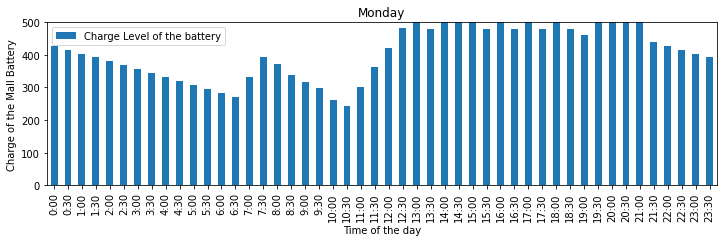

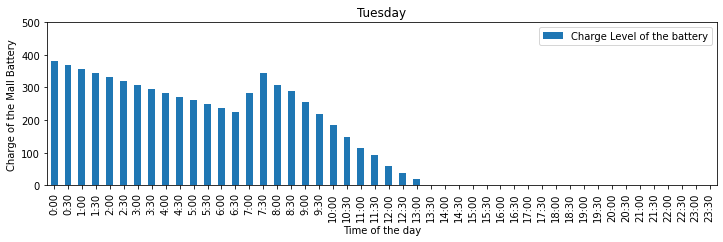

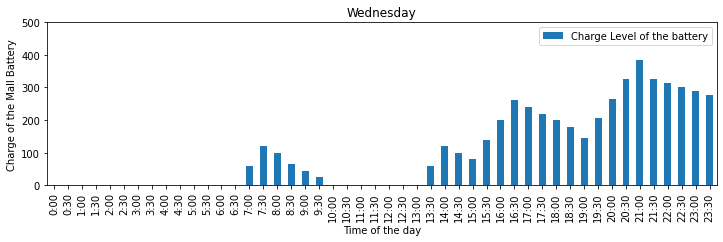

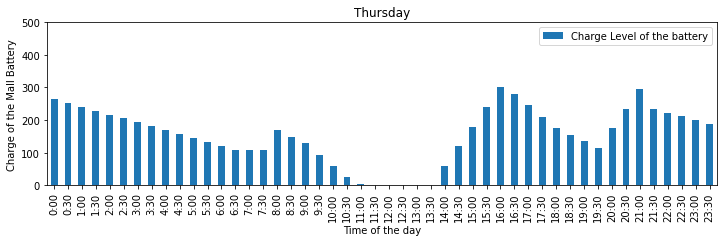

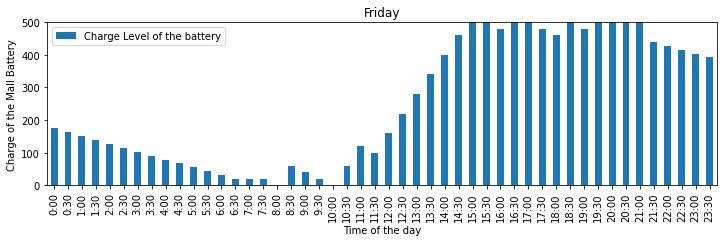

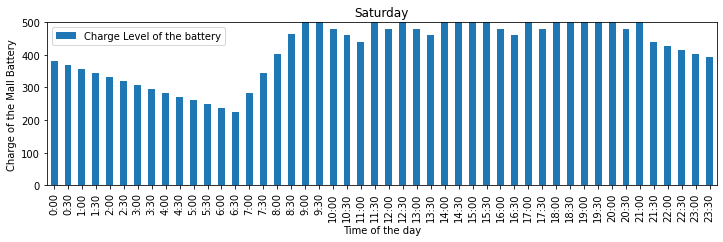

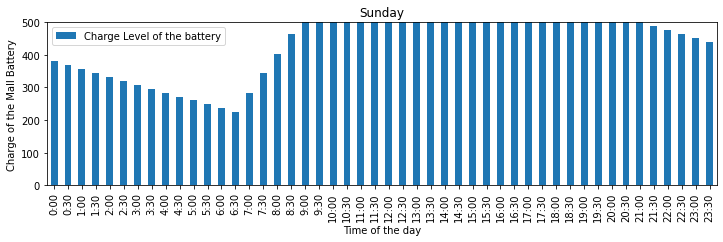

In [22]:
for i in cols:
    ax=df_mall_battery_conv.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Charge Level of the battery")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()


In [23]:
for i in range(len(cols)):
    df_CO2["conv"+cols[i]] = a_CO2_prod_conv[i]

Graphs over weekdays of CO2 production for each half an hour time slot for the system SolarProduction+EnergyNeed considering a lumped mall battery. compared to the Co2 production of the system without mall battery.

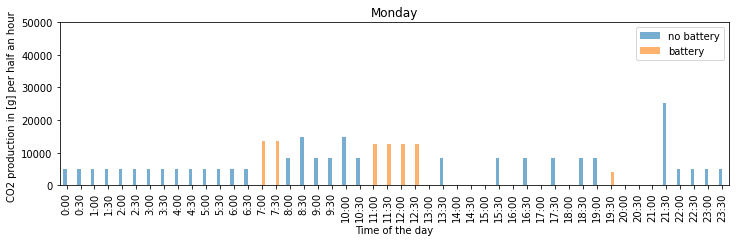

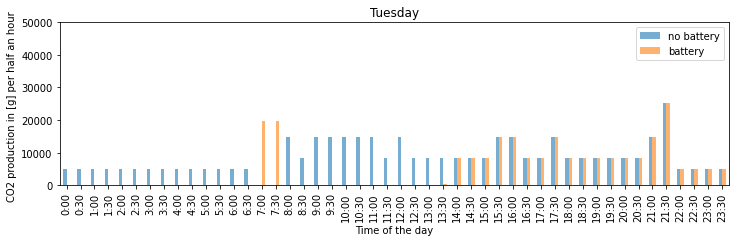

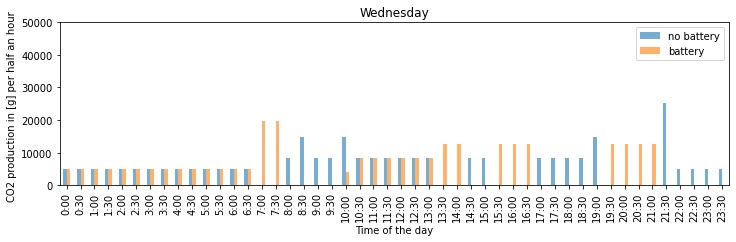

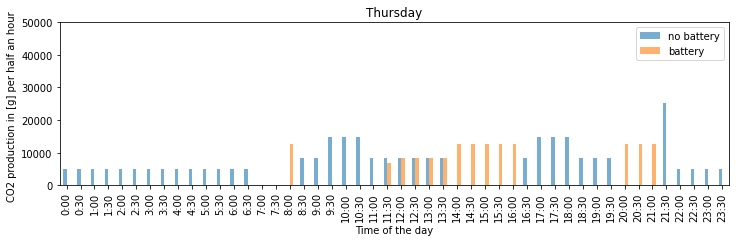

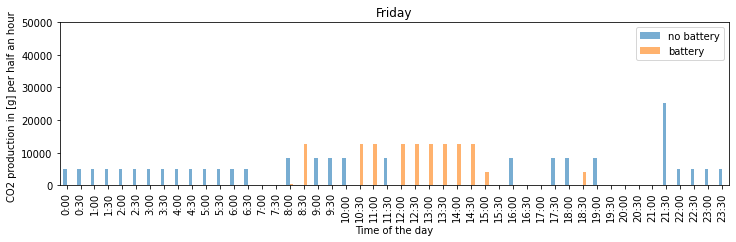

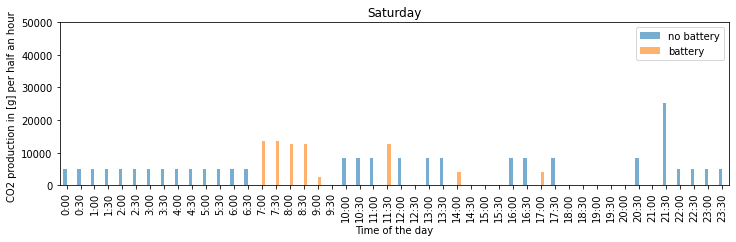

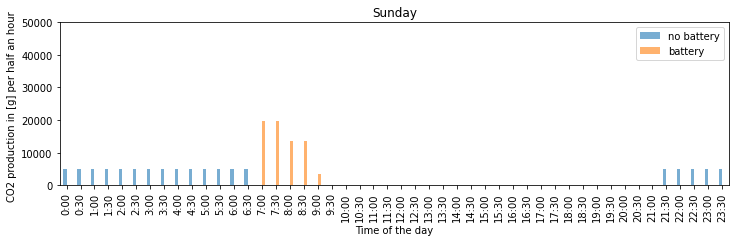

In [24]:
for i in cols:
    j="conv"+i
    ax=df_CO2.plot(x="Time", y=[i, j], kind="bar", figsize=(12, 3), label=["no battery", "battery"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,50000])

plt.show()

# Quantum annealer solution for lumped mall battery modeling
Now we solve the same problem on the quantum annealer.
To do so we choose the D-Wave advantage device, using a standard DWaveSampler and a EmbeddingComposite, as
LeapHybridSamplers drain too much credit from the account
       


In [25]:

## for dwave the sign convention is opposite with respect to qaoa
## if we add the quadratic terms as full matrix we do not have to double the off diagonal terms

from dwave.system import DWaveSampler
n_times=48
n_days = 7
n_bat_mall=1
r_bat_mall=120
r_bat_v=120
dt=0.5 # fraction of an hour

C_bat_status=np.zeros((n_days, n_times))
a_CO2_prod_dwave=np.zeros((n_days, n_times))

#for d in range (n_days):
 #   for t in range(n_times):
n_qub_mb=3*n_bat_mall

for d in range (n_days):
#for d in range (1):
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=0
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=(r_bat_mall**2)*aa_pp*dt*dt
            
        
        E_imb=a_imb[d,t]
        mu_p=np.zeros((n_qub_tot))
       
        r_bat_mdisc=r_bat_mall*dt 
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall*dt)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=+aa_pbd*(r_bat_disc*r_bat_v)*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=-aa_pbr*(r_bat_charge*r_bat_v)*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=-aa_pbd*(r_bat_disc*r_bat_v)*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=aa_pbr*(r_bat_charge*r_bat_v)*dt
            mu_p[3*k]=( - 2*aa_pp*E_imb*r_bat_mdisc)    
            mu_p[3*k+1]=+(2*aa_pp*E_imb*r_bat_mcharge)
            mu_p[3*k+2]=0.
           

        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=10
        
        
        sigma=+fac_bound*sigma_slack+sigma_p
        mu=np.true_divide(mu_p, fac_bound)+mu_slack
        #mu=mu_p+fac_bound*mu_slack
        
        # run classical simulated annealing
        model = dimod.BinaryQuadraticModel(vartype="BINARY")
        model.add_linear_from_array(mu)
        model.add_quadratic_from_dense(sigma)
        
        print(model.quadratic)
        print(model.linear)
       
        if E_imb>0:
            model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        else:
            model.add_linear_inequality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000,label="eq2", ub=-E_imb)
        
        s3_folder = ("dummy_variable", "dummy_variable")
        #sampler = BraketDWaveSampler(s3_folder,device_arn='arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6')
        #sampler = EmbeddingComposite(sampler)
        #sampleset = sampler.sample(model, num_reads=100)
        
        sampler=DWaveSampler(solver={'topology__type': 'pegasus'})
        sampler =EmbeddingComposite(sampler)
        results = sampler.sample(model, label='Example')

        
        print(results)
        

        # response aggregate
        # run classical simulated annealing
        best_solution = results.first.sample
        print("Best solution")
        print(best_solution)
        energy=results.first.energy
        

        
        c_stars=np.zeros((n_qub_tot))
        for k,v in best_solution.items():
            if (isinstance(k, int)):
                c_stars[int(k)]=v
       
        # response aggregate
        #response_aggregate = response.aggregate()
        #print(response_aggregate)
        if (c_stars[0]==1 and c_stars[1]==1):
            c_stars[0]=0
            c_stars[1]=0
        
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        print(E_plug)
        
        a_CO2_prod_dwave[d,t]=420.0*max(E_plug,0)
        
        
                                             

        
        
        
        

print(C_bat_status[n_days-1,n_times-1])

{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.

C:\Users\julie\.conda\envs\womanium\lib\site-packages\dimod\binary\binary_quadratic_model.py:764: UserWarning: Did not add constraint eq2. This constraint is feasible with any value for state variables.
  warnings.warn(


   0  1  2 energy num_oc. chain_.
0  0  1  0 -337.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
32.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -157.8, 1: -337.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1 -118.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1  -42.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -246.0, 1: 419.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0 -246.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1  -42.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 vari

   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2    energy num_oc. chain_.
0  0  0  1 1439999.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 0, 2: 1}
12.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 v

   0  1  2     energy num_oc. chain_.
0  0  1  0 64000239.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
80.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -81.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -246.0, 1: 419.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0 -246.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -721.0, 1: 719.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1 -682.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
55.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -24001.0, 1: 143.0, 2: -1.0}
   0  1  2    energy num_oc. chain_.
0  0  0  0 1440000.0       1     0.0
['BINARY', 1 rows, 

   0  1  2 energy num_oc. chain_.
0  0  1  0 -361.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
30.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -81.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1  -42.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -181.0, 1: -361.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  0  1  0 -361.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
30.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -181.0, 1: -361.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  0  1  1 -322.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 va

   0  1  2 energy num_oc. chain_.
0  1  0  0 -181.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1  -42.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1  -42.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -246.0, 1: 419.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0 -246.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -246.0, 1: 419.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0 -246.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variab

   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2    energy num_oc. chain_.
0  0  0  1 1439999.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 va

   0  1  2   energy num_oc. chain_.
0  0  1  0 -60001.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
-30.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -721.0, 1: 119999.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0 -721.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2    energy num_oc. chain_.
0  0  0  1 1439999.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 0, 2: 1}
12.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -29.8, 1: 143.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 sa

   0  1  2   energy num_oc. chain_.
0  0  1  0 -60001.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
-30.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 39999.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -81.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 239.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -81.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
0.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -181.0, 1: -361.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  0  1  1 -322.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 1}
10.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -81.0, 1: 39999.0, 2: -1.0}
   0  1  2 energy num_oc. chain_.
0  1  0  0  -81.0       1     0.0
['BINARY', 1 rows, 1 sample

   0  1  2   energy num_oc. chain_.
0  0  1  0 -26001.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
-13.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -34.8, 1: -26001.0, 2: -1.0}
   0  1  2   energy num_oc. chain_.
0  0  1  0 -26001.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
-13.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -34.8, 1: -26001.0, 2: -1.0}
   0  1  2   energy num_oc. chain_.
0  0  1  0 -26001.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 0}
-13.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -157.8, 1: -56001.0, 2: -1.0}
   0  1  2   energy num_oc. chain_.
0  0  1  1 -55962.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 1, 2: 1}
-28.0
{(1, 0): 3640.0, (2, 0): 40.0, (2, 1): 40.0}
{0: -157.8, 1: -56001.0, 2: -1.0}
   0  1  2   energy num_oc. chain_.
0  0  1  1 -55962.0       1     0.

In [26]:
df_mall_battery= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery[cols[i]] = C_bat_status[i]

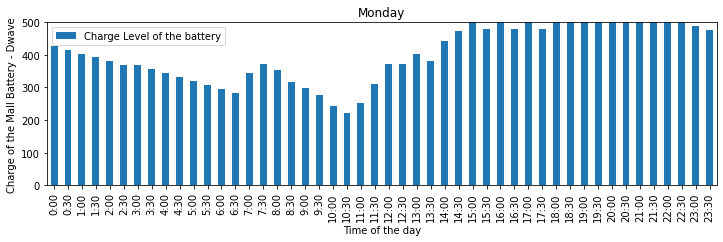

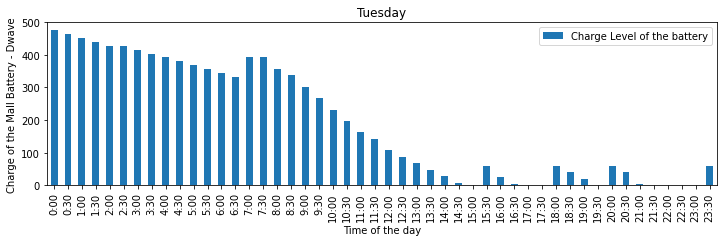

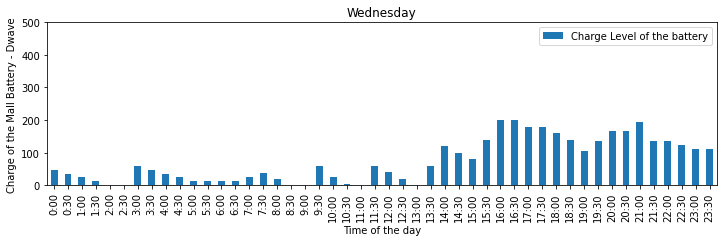

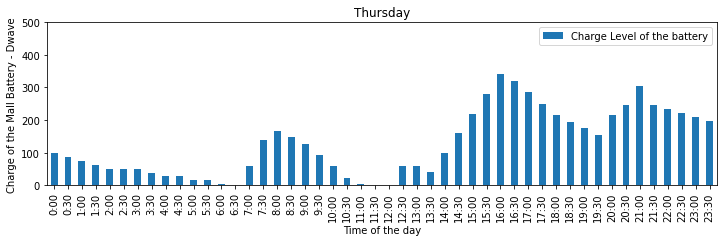

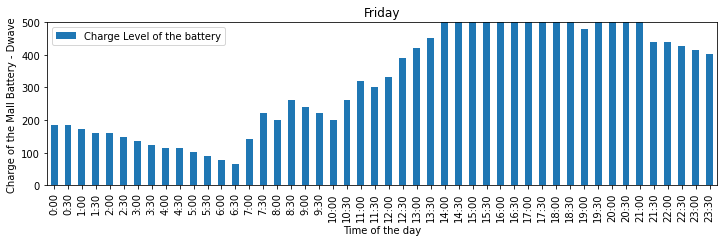

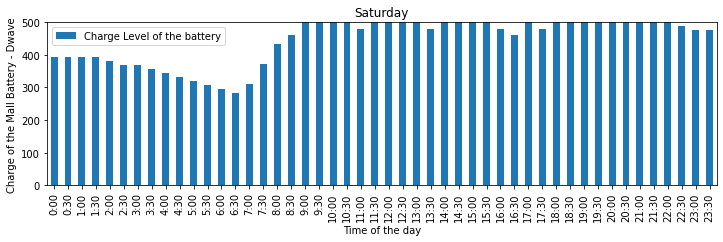

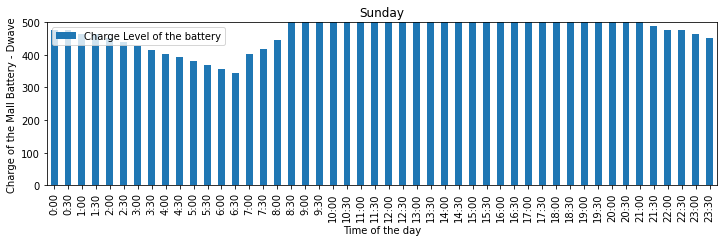

In [27]:
for i in cols:
    ax=df_mall_battery.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Charge Level of the battery")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery - Dwave")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()

In [28]:
for i in range(len(cols)):
    df_CO2["dwave"+cols[i]] = a_CO2_prod_dwave[i]

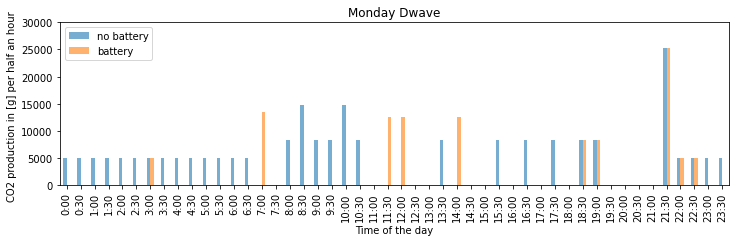

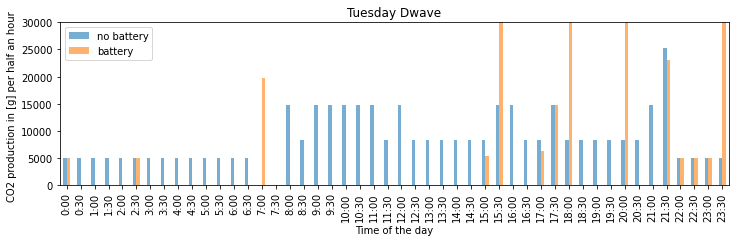

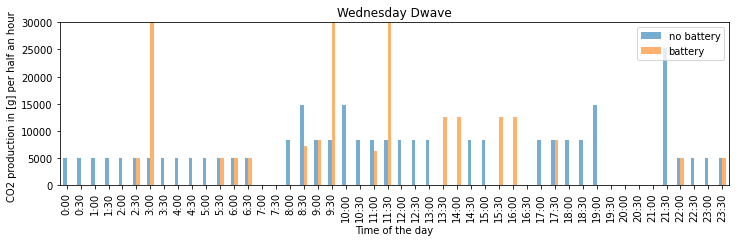

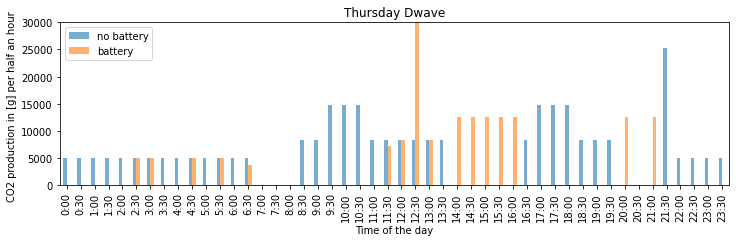

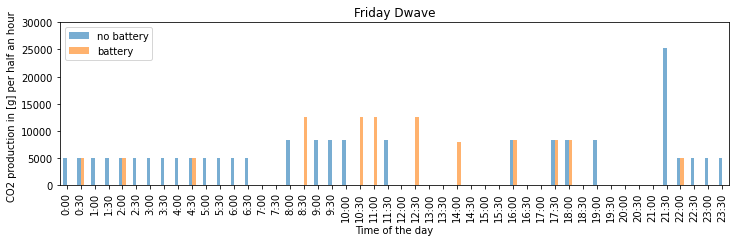

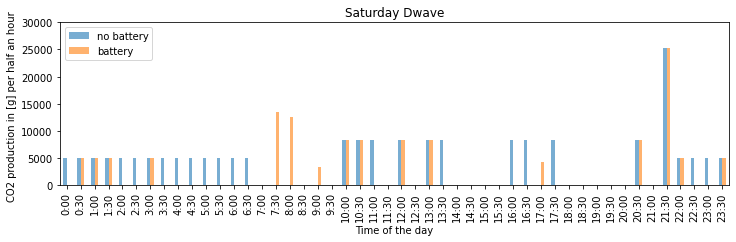

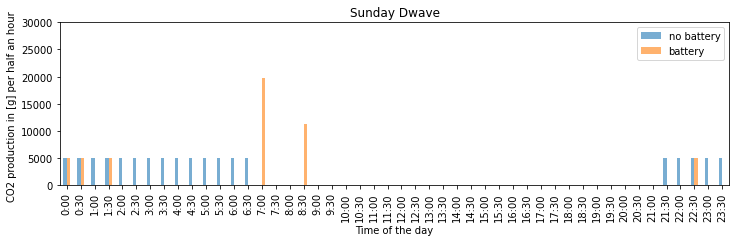

In [29]:
for i in cols:
    j="dwave"+i
    ax=df_CO2.plot(x="Time", y=[i, j], kind="bar", figsize=(12, 3), label=["no battery", "battery"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i]+" Dwave")
    ax.set_ylim([0,30000])

plt.show()

# Quantum annealer optimization of the ten batteries array for the mall

In [ ]:
from qiskit import Aer

# cplex loop implementation with ten batteries
sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7

r_bat_v=120
delta_t=0.5 # fraction of an hour

n_mall_10=10
c_mall_10=50
r_bat_mall_10=120

n_bat_mall=n_mall_10
C_bat_status_10=np.zeros((n_days, n_times,n_mall_10))

a_CO2_prod_dwave_10=np.zeros((n_days, n_times))



#for d in range (n_days):
 #   for t in range(n_times):


for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall_10=np.array([50,50,50,50,50, 50,50,50,40,0])
        elif t==0:
            C_bat_mall_10=C_bat_status_10[d-1,n_times-1,:] 
        else:
            C_bat_mall_10=C_bat_status_10[d,t-1,:]
        N_v=0
        n_qub_mb=n_mall_10*3
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        print("N qub tot = %d"%n_qub_tot)
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_mall_10):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp
        
        E_imb=a_imb[d,t]
        for k in range(n_mall_10):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=-aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=-aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
        
        
        r_bat_mdisc_10=np.full((10),r_bat_mall_10)
        r_bat_mcharg_10=np.full((10),r_bat_mall_10)
        
        r_bat_mdisc_10[C_bat_mall_10 == 0]=0
        print(r_bat_mdisc_10)
        if (N_v ==0): 
            for k in range(n_mall_10):
                r_bat_mdisc_10[k]=min(E_imb, r_bat_mdisc_10[k])
        
        r_bat_mcharg_10[C_bat_mall_10==50]=0
        for k in range(n_bat_mall): 
            mu_p[3*k]=( + 2*aa_pp*E_imb*r_bat_mdisc_10[k])
            mu_p[3*k+1]=-(2*aa_pp*E_imb*r_bat_mcharg_10[k])
            mu_p[3*k+2]=0.        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
    
        sigma_slack_10=np.zeros((n_qub_tot,n_qub_tot))
        for k in range(n_mall_10):
            sigma_slack_10[3*k, 3*k+1]=2
            sigma_slack_10[3*k, 3*k+2]=2
            sigma_slack_10[3*k+1, 3*k+2]=2
    
        mu_slack_10=np.full((n_qub_tot),-1)
    
        fac_bound=10
        sigma=fac_bound*sigma_slack_10+sigma_p
        mu=fac_bound*mu_slack_10+mu_p
        
        
       
        if t>0:
            for k in range(n_bat_mall):
                if  C_bat_status_10[d,t-1,k]==50:
                    c_stars[3*k+1]=0
                if  C_bat_status_10[d,t-1,k]==0:
                    c_stars[3*k]=0
        
        if E_imb>0:
            model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        else:
            model.add_linear_inequality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000,label="eq2", ub=-E_imb)
        
        sampler=DWaveSampler(solver={'topology__type': 'pegasus'})
        sampler =EmbeddingComposite(sampler)
        results = sampler.sample(model, label='Example')

        
        print(results)
        s3_folder = ("dummy_variable", "dummy_variable")
        #sampler = BraketDWaveSampler(s3_folder,device_arn='arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6')
        #sampler = EmbeddingComposite(sampler)
        #sampleset = sampler.sample(model, num_reads=100)

        # response aggregate
        # run classical simulated annealing
        best_solution = results.first.sample
        print("Best solution")
        print(best_solution)
        energy=results.first.energy
        

        
        c_stars=np.zeros((n_qub_tot))
        for k,v in best_solution.items():
            if (isinstance(k, int)):
                c_stars[int(k)]=v
       
        # response aggregate
        #response_aggregate = response.aggregate()
        #print(response_aggregate)
        if (c_stars[0]==1 and c_stars[1]==1):
            c_stars[0]=0
            c_stars[1]=0
        
        
        
       
        for k in range(n_bat_mall):
            C_bat_status_10[d,t,k]=C_bat_mall_10[k]-r_bat_mdisc_10[k]*c_stars[3*k]+r_bat_mcharg_10[k]*c_stars[3*k+1]
            if C_bat_status_10[d,t,k] > 50: 
                C_bat_status_10[d,t,k] = 50
            if C_bat_status_10[d,t,k] < 0: 
                C_bat_status_10[d,t,k] = 0
        
        
        
        
        E_plug=E_imb+np.sum(C_bat_status_10[d,t,:]-C_bat_mall_10)
        
        
                                             
        
        a_CO2_prod_dwave_10[d,t]=420.0*max(E_plug,0)    
                                             
        
         

print(C_bat_status_10[n_days-1,n_times-1, :])

N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2    energy num_oc. chain_.
0  0  0  1 5759999.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 0, 2: 1}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2 energy num_oc. chain_.
0  1  0  1    9.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1

C:\Users\julie\.conda\envs\womanium\lib\site-packages\dimod\binary\binary_quadratic_model.py:764: UserWarning: Did not add constraint eq2. This constraint is feasible with any value for state variables.
  warnings.warn(


   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2 energy num_oc. chain_.
0  1  0  0  -29.8       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2     energy num_oc. chain_.
0  0  0  1 27039999.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 0, 2: 1}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2    energy num_oc. chain_.
0  1  0  0 5929970.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[120 120 120 120 120 120 120 120 120   0]
   0  1  2    energy num_oc. chain_.
0  1  0  1 6570009.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot = 30
[  0 120 120 120 

   0  1  2     energy num_oc. chain_.
0  1  0  1 40020009.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2     energy num_oc. chain_.
0  1  0  1 40020009.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2      energy num_oc. chain_.
0  0  0  1 142259999.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 0, 2: 1}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2     energy num_oc. chain_.
0  1  0  0 40019970.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2     energy num_oc. chain_.
0  1  0  1 40020009.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot 

   0  1  2      energy num_oc. chain_.
0  1  0  1 131490009.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2      energy num_oc. chain_.
0  1  0  1 131490009.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 1}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2      energy num_oc. chain_.
0  0  0  0 391410000.0       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 0, 1: 0, 2: 0}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2      energy num_oc. chain_.
0  1  0  0 131489970.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N qub tot = 30
[  0 120 120 120 120 120 120 120 120   0]
   0  1  2      energy num_oc. chain_.
0  1  0  0 131489970.2       1     0.0
['BINARY', 1 rows, 1 samples, 3 variables]
Best solution
{0: 1, 1: 0, 2: 0}
N 

In [ ]:
df_mall_battery_10m= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

for i in range(len(cols)):
    for k in range(n_bat_mall):
        df_mall_battery_10m[cols[i]+str(k)] = C_bat_status_10[i,:,k]
        

        

In [ ]:
labels=[]
for i in range(10):
    labels.append("B"+str(i))

for i in range(len(cols)):
    id =cols[i]
    col_new=[]
    for k in range(n_mall_10):
        col_new.append(id+str(k))
    print(col_new)
    ax=df_mall_battery_10m.plot(x="Time", y=col_new, kind="bar", figsize=(12, 3),  stacked=True, label=labels)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_title(full_names[cols[i]])
plt.show()

In [ ]:
labels=[]
for i in range(10):
    labels.append("B"+str(i))

for i in range(len(cols)):
    id =cols[i]
    col_new=[]
    for k in range(n_mall_10):
        col_new.append(id+str(k))
    print(col_new)
    ax=df_mall_battery_10m.plot(x="Time", y=col_new, kind="bar", figsize=(12, 3),  stacked=True, label=labels)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_title(full_names[cols[i]])
plt.show()

In [ ]:
#for i in range(len(cols)):
#    df_CO2["dwave_10"+cols[i]] = a_CO2_prod_cplex_10[i]

# Quantum annealer optimization of the  mall full system with vehicles

In [ ]:
from dwave.system import DWaveSampler

# Dwave loop implementation with ten batteries
sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7

r_bat_v=60
dt=0.5 # fraction of an hour

n_mall_10=10
c_mall_10=50
r_bat_mall_10=120

n_bat_mall=n_mall_10
C_bat_status_10=np.zeros((n_days, n_times,n_mall_10))

a_CO2_prod_dwave_10=np.zeros((n_days, n_times))
N_charg_cars=np.zeros((n_days, n_times), dtype=int)
N_disc_cars=np.zeros((n_days, n_times), dtype=int)

#for d in range (n_days):
 #   for t in range(n_times):


for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall_10=np.array([50,50,50,50,50, 50,50,50,40,0])
        elif t==0:
            C_bat_mall_10=C_bat_status_10[d-1,n_times-1,:] 
        else:
            C_bat_mall_10=C_bat_status_10[d,t-1,:]
        N_v=0
        n_qub_mb=n_mall_10*3
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        print("N qub tot = %d"%n_qub_tot)
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_mall_10):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp*dt*dt
        
        E_imb=a_imb[d,t]
        for k in range(n_mall_10):
            for i in range(N_v):
                sigma_p[3*k, 3*(i+n_mall_10)]=a_prd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*(i+n_mall_10)+1]=-a_prc*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1, 3*(i+n_mall_10)]=-a_prd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*(i+n_mall_10)+1]=a_prc*(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
        
        
        r_bat_mdisc_10=np.full((10),r_bat_mall_10*dt)
        r_bat_mcharg_10=np.full((10),r_bat_mall_10*dt)
        
        r_bat_mdisc_10[C_bat_mall_10 == 0]=0
        print(r_bat_mdisc_10)
        if (N_v ==0): 
            for k in range(n_mall_10):
                r_bat_mdisc_10[k]=min(E_imb, r_bat_mdisc_10[k])
        
        r_bat_mcharg_10[C_bat_mall_10==50]=0
        for k in range(n_bat_mall): 
            mu_p[3*k]=( + 2*aa_pp*E_imb*r_bat_mdisc_10[k])
            mu_p[3*k+1]=-(2*aa_pp*E_imb*r_bat_mcharg_10[k])
            mu_p[3*k+2]=0.        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
    
        sigma_slack_10=np.zeros((n_qub_tot,n_qub_tot))
        for k in range(n_bat_mall):
            sigma_slack_10[3*k, 3*k+1]=2
            sigma_slack_10[3*k, 3*k+2]=2
            sigma_slack_10[3*k+1, 3*k+2]=2
    
        mu_slack_10=np.full((n_qub_tot),-1)
    
        fac_bound=10
        sigma=sigma_slack_10+np.true_divide(sigma_p, fac_bound)
        mu=mu_slack_10+np.true_divide(mu_p, fac_bound)
        
        
        
        # run classical simulated annealing
        model = dimod.BinaryQuadraticModel(vartype="BINARY")
        model.add_linear_from_array(mu)
        model.add_quadratic_from_dense(sigma)
        model.add_linear_equality_constraint([(0, 1), (1, 1), (2, 1) ], 1000, -1)
        
        
        if E_imb>0:
            model.add_linear_equality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000, -E_imb)
        else:
            model.add_linear_inequality_constraint([(0, r_bat_mdisc), (1, -r_bat_mcharge), (2, 0) ], 10000,label="eq2", ub=-E_imb)
       
        
        sampler=DWaveSampler(solver={'topology__type': 'pegasus'})
        sampler =EmbeddingComposite(sampler)
        #sampler = BraketDWaveSampler(s3_folder,device_arn='arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6')
        #sampler = EmbeddingComposite(sampler)
        #sampleset = sampler.sample(model, num_reads=100)

        # response aggregate
        # run classical simulated annealing
        best_solution = results.first.sample
        print("Best solution")
        print(best_solution)
        energy=results.first.energy
        

        
        c_stars=np.zeros((n_qub_tot))
        for k,v in best_solution.items():
            if (isinstance(k, int)):
                c_stars[int(k)]=v

        if t>0:
            for k in range(n_bat_mall):
                if  C_bat_status_10[d,t-1,k]==50:
                    c_stars[3*k+1]=0
                if  C_bat_status_10[d,t-1,k]==0:
                    c_stars[3*k]=0
        
        
        for k in range(n_bat_mall):
            C_bat_status_10[d,t,k]=C_bat_mall_10[k]-r_bat_mdisc_10[k]*c_stars[3*k]+r_bat_mcharg_10[k]*c_stars[3*k+1]
            if C_bat_status_10[d,t,k] > 50: 
                C_bat_status_10[d,t,k] = 50
            if C_bat_status_10[d,t,k] < 0: 
                C_bat_status_10[d,t,k] = 0
        
        #print(C_bat_status[d,t])
        E_plug=E_imb+np.sum(C_bat_status_10[d,t,:]-C_bat_mall_10)
        
        
        N_charg_cars[d,t]=np.sum(c_stars[4:n_qub_tot:3])
        N_disc_cars[d,t]=np.sum(c_stars[3:n_qub_tot:3])                                   
        
        a_CO2_prod_dwave_10[d,t]=420.0*E_plug -80*r_bat_v*dt*float(N_charg_cars[d,t])+80*r_bat_v*dt*float(N_charg_cars[d,t])
        
                                             
        
          

print(C_bat_status_10[n_days-1,n_times-1, :])

In [ ]:
df_mall_battery_10m= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

for i in range(len(cols)):
    for k in range(n_bat_mall):
        df_mall_battery_10m[cols[i]+str(k)] = C_bat_status_10[i,:,k]
        

        

In [ ]:
for i in range(len(cols)):
    id= cols[i]
    col_new=[]
    for k in range(n_mall_10):
        col_new.append(id+str(k))
    print(col_new)
    ax=df_mall_battery_10m.plot(x="Time", y=col_new, kind="bar", figsize=(12, 3),  stacked=True)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_title(full_names[cols[i]])
    plt.savefig(cols[i]+".png")
    
    plt.show()
